In [26]:
import pandas as pd
import numpy as np
import stumpy
from sklearn.ensemble import IsolationForest
from matplotlib import pyplot as plt

In [2]:
df_hotels = pd.read_pickle("./Israel_hotels_sector.pkl")

In [3]:
df_hotels

,PH,EC,ORP,TEMPERATURE,date,weekday,month,hour,point_id,channel_shape,diameter,water_authority,sector
0,5.900,2232.0,-43.0,24.0,2017-02-01 08:32:00,2,2,8,191,circular_pipe,0.2,3,399
1,5.900,2144.0,-46.0,25.0,2017-02-01 08:35:00,2,2,8,191,circular_pipe,0.2,3,399
2,5.800,2088.0,-45.0,25.0,2017-02-01 08:40:00,2,2,8,191,circular_pipe,0.2,3,399
3,5.800,2080.0,-45.0,25.0,2017-02-01 08:41:00,2,2,8,191,circular_pipe,0.2,3,399
4,5.700,2000.0,-45.0,25.0,2017-02-01 08:44:00,2,2,8,191,circular_pipe,0.2,3,399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044560,3.567,0.0,159.0,31.7,2020-07-05 05:40:00,6,7,5,2406,circular_pipe,0.5,7,399
2044561,3.791,0.0,157.0,31.7,2020-07-05 05:45:00,6,7,5,2406,circular_pipe,0.5,7,399
2044562,3.454,0.0,170.0,31.6,2020-07-05 05:50:00,6,7,5,2406,circular_pipe,0.5,7,399
2044563,3.284,0.0,175.0,31.5,2020-07-05 05:55:00,6,7,5,2406,circular_pipe,0.5,7,399


<div class="alert alert-info"><b>Motifs detection with Matrix profile</b>

In [8]:
cols = ['PH','EC','ORP','TEMPERATURE']
all_gpu_devices = []  # Get a list of all available GPU devices

In [ ]:
for col in cols:
    matrix_profile = stumpy.gpu_stump(df_hotels[col], m=36, device_id=all_gpu_devices)

<div class="alert alert-info"><b>Anomalies detection with Isolation Forest</b>

In [67]:
ANOMALY_SCORE = -0.25
WINDOW = 36

In [10]:
clf = IsolationForest()

In [13]:
hotels_anomalies = clf.fit_predict(df_hotels[['PH', 'EC', 'ORP', 'TEMPERATURE']])
hotels_scores = clf.decision_function(df_hotels[['PH', 'EC', 'ORP', 'TEMPERATURE']])

In [29]:
anomalies_indices = np.argwhere(hotels_scores<ANOMALY_SCORE)

In [51]:
df_hotels.head()

,PH,EC,ORP,TEMPERATURE,date,weekday,month,hour,point_id,channel_shape,diameter,water_authority,sector
0,5.9,2232.0,-43.0,24.0,2017-02-01 08:32:00,2,2,8,191,circular_pipe,0.2,3,399
1,5.9,2144.0,-46.0,25.0,2017-02-01 08:35:00,2,2,8,191,circular_pipe,0.2,3,399
2,5.8,2088.0,-45.0,25.0,2017-02-01 08:40:00,2,2,8,191,circular_pipe,0.2,3,399
3,5.8,2080.0,-45.0,25.0,2017-02-01 08:41:00,2,2,8,191,circular_pipe,0.2,3,399
4,5.7,2000.0,-45.0,25.0,2017-02-01 08:44:00,2,2,8,191,circular_pipe,0.2,3,399


In [63]:
def plot_anomalies(df_hotels, cols, anomaly_index):
    fig, ax = plt.subplots(len(cols),
                           figsize=(15, 6),
                           gridspec_kw={'hspace': 0})
    ax[0].set_title(
        f'Anomaly -\npoint_id - {df_hotels.point_id[anomaly_index]}\ndate - {df_hotels.date[anomaly_index]}',
        fontsize=20)

    colors = ['blue', 'green', 'orange', 'black']
    for i, col_ in enumerate(cols):
        ax[i].plot(
            df_hotels[f'{col_}'].iloc[anomaly_index:anomaly_index + WINDOW],
            color=colors[i])
        ax[i].set_ylabel(f'{col_} \n level', fontsize='16')
    plt.show()

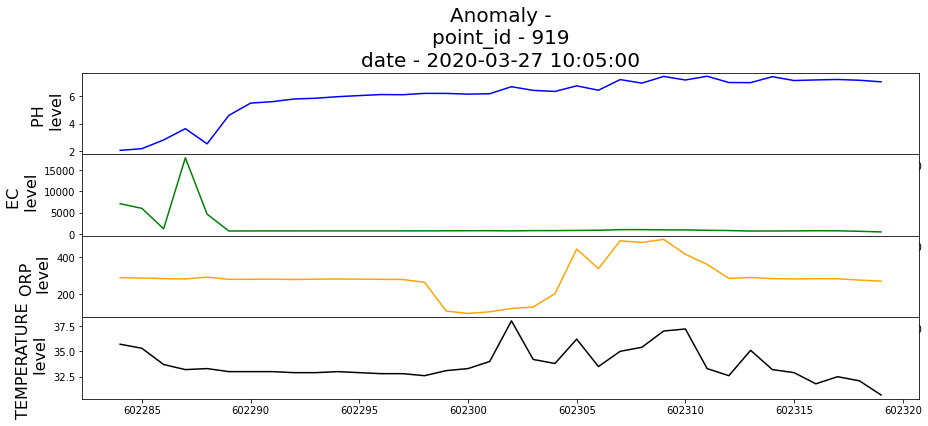

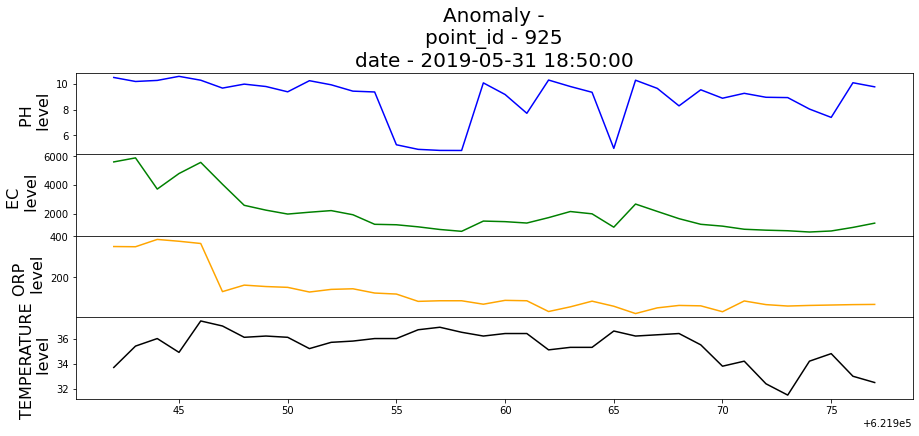

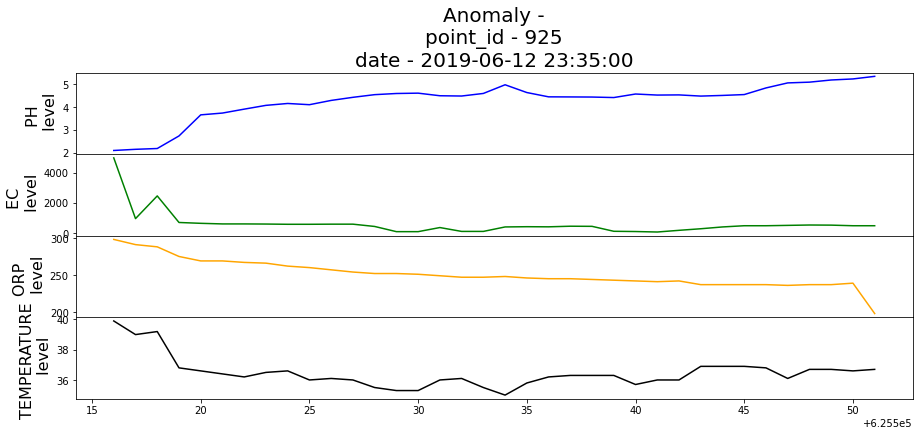

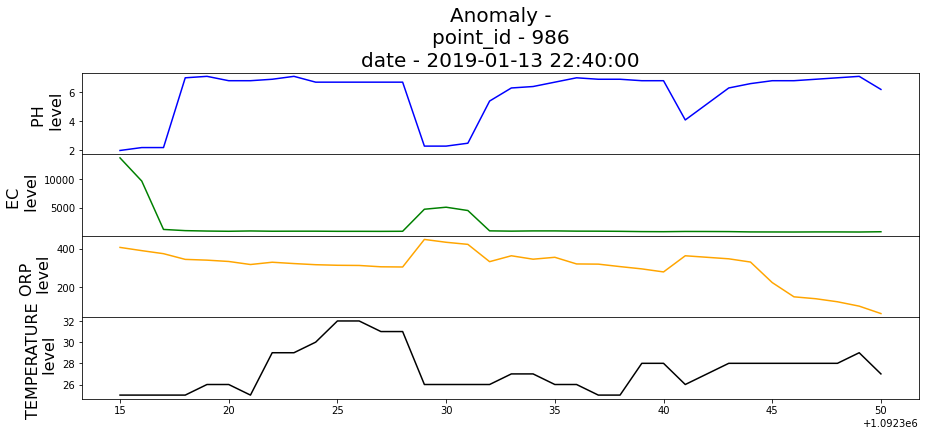

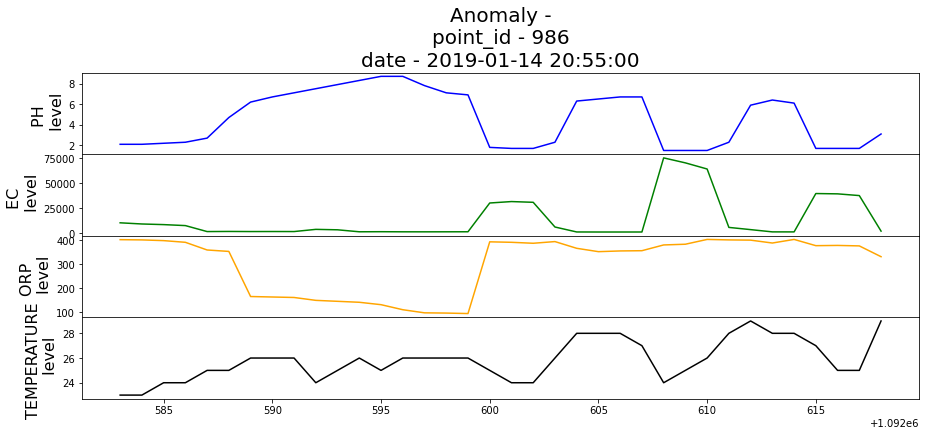

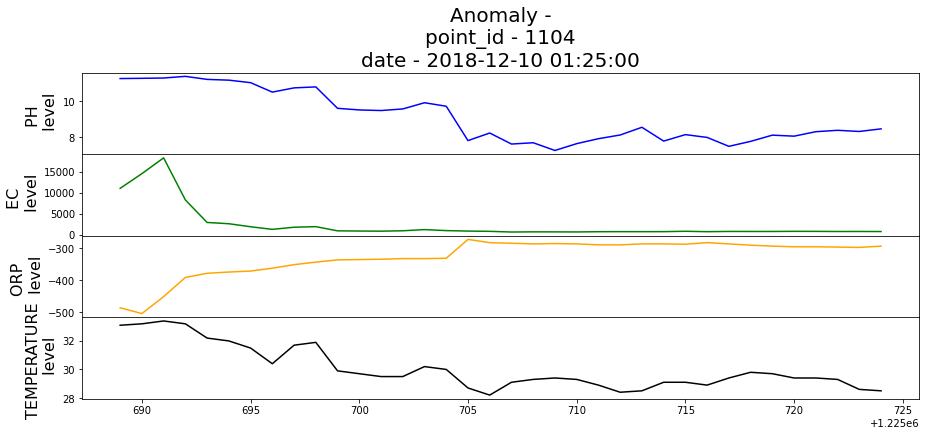

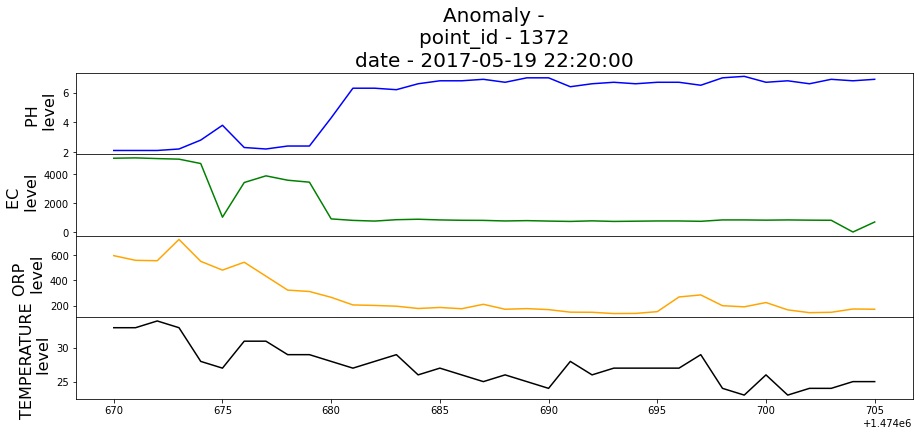

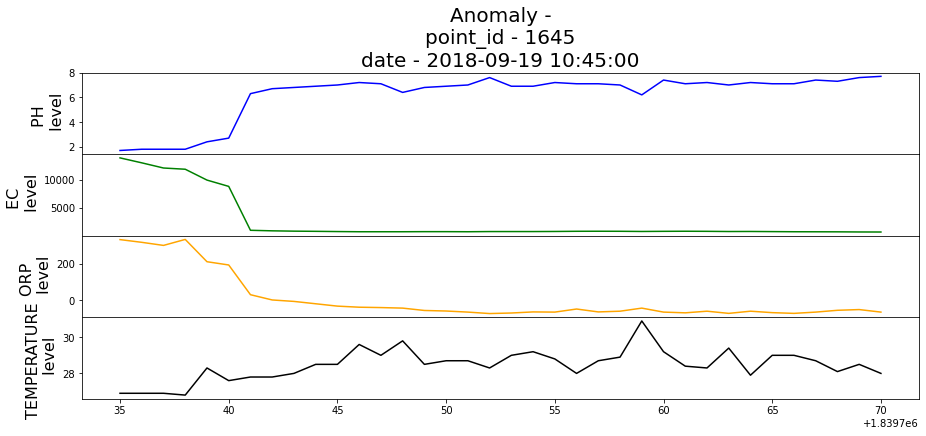

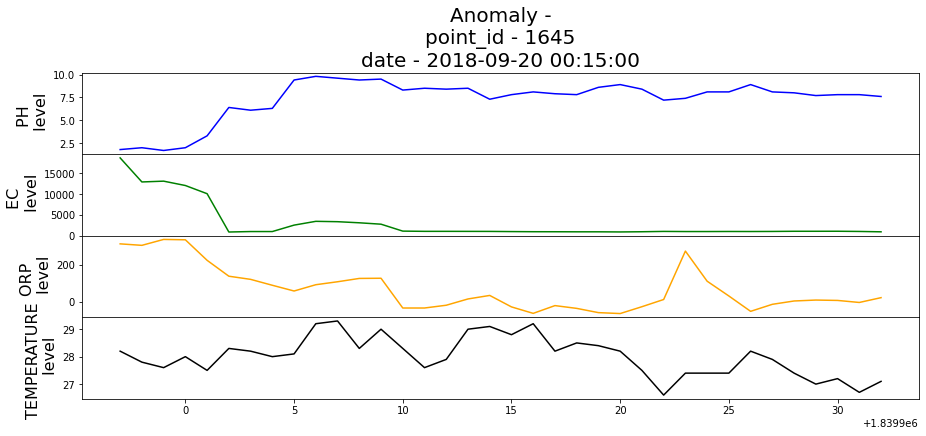

In [68]:
plot_anomalies(df_hotels, cols, anomalies_indices[0][0])
for i in range(1, len(anomalies_indices)):
    if anomalies_indices[i-1][0]+WINDOW < anomalies_indices[i][0]:
        plot_anomalies(df_hotels, cols, anomalies_indices[i][0])